In [69]:
!pip install resources

  Created wheel for resources: filename=resources-0.0.1-py3-none-any.whl size=4365 sha256=d7e7760763ecc3dfcb755e8238c8f8d0695a4046c92e16faf9f71a14d939616b
  Stored in directory: /root/.cache/pip/wheels/54/35/06/12a2779fd29ff1daac3af2153e10a80779cf08592b011c4632
Successfully built resources


In [71]:
!pip install staty

  Created wheel for staty: filename=staty-1.2.4-py2.py3-none-any.whl size=9559 sha256=1c49e18020d0bc23f40246978542974a99158eacba7cc5842bcd9a999926dcb1
  Stored in directory: /root/.cache/pip/wheels/73/c8/ff/cd44a9aa84c6b1c3c36161f42124168762cbedd66ee1e25a08
Successfully built staty


In [1]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 170 kB 9.8 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 214 kB 48.9 MB/s 
     |████████████████████████████████| 1.1 MB 44.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have

In [2]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/7778Za9WegNne7RX5T0CrR6v_wEq0WGRbVzm50bXvXE
API Key valid
Gitlab access token valid
Saved details successfully!


In [3]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c age-prediction -o data

sample_submission.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

test.zip:   0%|          | 0.00/176M [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/236M [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

val.zip:   0%|          | 0.00/117M [00:00<?, ?B/s]

In [4]:
!unzip data/train.zip -d data/train > /dev/null
!unzip data/val.zip -d data/val > /dev/null
!unzip data/test.zip -d data/test > /dev/null

In [5]:
import cv2
from glob import glob
import numpy as np
import os
import pandas as pd
from PIL import Image
import warnings

warnings.filterwarnings("ignore")

In [6]:
train_images_root = "data/train"
val_images_root = "data/val"
test_images_root = "data/test"
train_metadata_path = "data/train.csv"
val_metadata_path = "data/val.csv"
test_metadata_path = "data/test.csv"

In [7]:
train_df = pd.read_csv(train_metadata_path)
train_df.head()

,ImageID,age
0,93vu1,30-40
1,yjifi,80-90
2,ldd2k,90-100
3,eiwe0,40-50
4,sc0bp,0-10


In [8]:
val_df = pd.read_csv(val_metadata_path)
val_df.head()

,ImageID,age
0,444vl,40-50
1,4eg4u,80-90
2,8pk8y,40-50
3,qow33,90-100
4,7ittd,20-30


In [9]:
test_df = pd.read_csv(test_metadata_path)
test_df.head()

,ImageID,age
0,8rti7,40-50
1,575pj,30-40
2,6ma92,30-40
3,jtu3e,20-30
4,svx4s,10-20


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageID  4000 non-null   object
 1   age      4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [11]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageID  2000 non-null   object
 1   age      2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageID  3000 non-null   object
 1   age      3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [13]:
for column in train_df.columns[1:]:
    print(f"Unique elements in {column} : {train_df[column].nunique()}")

Unique elements in age : 10


In [14]:
train_df["age"].value_counts()

90-100    736
0-10      401
50-60     385
80-90     374
20-30     361
60-70     357
40-50     355
10-20     350
30-40     342
70-80     339
Name: age, dtype: int64

In [15]:
val_df["age"].value_counts()

90-100    351
70-80     202
60-70     201
30-40     194
80-90     191
40-50     189
0-10      171
10-20     168
20-30     167
50-60     166
Name: age, dtype: int64

In [16]:
test_df["age"].value_counts()

70-80     318
80-90     313
10-20     311
60-70     308
40-50     307
50-60     306
90-100    298
30-40     293
20-30     284
0-10      262
Name: age, dtype: int64

In [17]:
class_encode_dict = {
    "0-10" : 0,
    "10-20" : 1,
    "20-30" : 2,
    "30-40" : 3,
    "40-50" : 4,
    "50-60" : 5,
    "60-70" : 6,
    "70-80" : 7,
    "80-90" : 8,
    "90-100" : 9
}

In [18]:
for dataframe in [train_df, val_df, test_df]:
  for key in class_encode_dict.keys():
    dataframe.replace(key, class_encode_dict[key], inplace = True)

In [19]:
train_df.head(), val_df.head(), test_df.head()

(  ImageID  age
 0   93vu1    3
 1   yjifi    8
 2   ldd2k    9
 3   eiwe0    4
 4   sc0bp    0,   ImageID  age
 0   444vl    4
 1   4eg4u    8
 2   8pk8y    4
 3   qow33    9
 4   7ittd    2,   ImageID  age
 0   8rti7    4
 1   575pj    3
 2   6ma92    3
 3   jtu3e    2
 4   svx4s    1)

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as transforms
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
import time
from termcolor import cprint

In [45]:
class Conv(nn.Module):

  def __init__(self, 
               in_channels,
               out_channels,
               kernel_size,
               stride=(1,1),
               padding=(0,0),
               momentum=0.15):
    super(Conv, self).__init__()
    self.conv_block = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
        nn.BatchNorm2d(out_channels, momentum = momentum),
        nn.ReLU()
    )

  def forward(self, x):
    return self.conv_block(x)


class AgeNet(nn.Module):

  def __init__(self,
               in_channels,
               num_classes,
               height = 128,
               width = 128,
               num_dsample = 3,
               kernel_sizes = [7,5,3],
               linear_fblock_dim = 1024):
    super(AgeNet, self).__init__()
    self.conv_block = nn.ModuleList([
                       nn.Sequential(
                           Conv(in_channels * 2**index, in_channels * 2**(index+1), kernel_sizes[index]),
                           nn.MaxPool2d((2,2)),
                       )
                       for index in range(num_dsample)]) # 128 -> 122 -> 61 -> 57 -> 28 -> 26 -> 13
    for index in range(num_dsample):
      height -= kernel_sizes[index] - 1
      height //= 2
      width -= kernel_sizes[index] - 1
      width //= 2
    self.fc_layer = nn.Sequential(
        nn.Linear(height * width * in_channels * 2**num_dsample, linear_fblock_dim),
        nn.Linear(linear_fblock_dim, num_classes)
    )

  def forward(self, x):
    for layer in self.conv_block:
      x = layer(x)
    x = x.view(x.shape[0], -1)
    x = self.fc_layer(x)

    return x

In [46]:
rand_data = torch.randn(3, 3, 128, 128)
model = AgeNet(3, 10)
op = model(rand_data)
op.shape

torch.Size([3, 10])

In [47]:
for name, param in model.named_parameters():
  print(f"{name} : {param.shape}, requires_grad : {param.requires_grad}")

conv_block.0.0.conv_block.0.weight : torch.Size([6, 3, 7, 7]), requires_grad : True
conv_block.0.0.conv_block.0.bias : torch.Size([6]), requires_grad : True
conv_block.0.0.conv_block.1.weight : torch.Size([6]), requires_grad : True
conv_block.0.0.conv_block.1.bias : torch.Size([6]), requires_grad : True
conv_block.1.0.conv_block.0.weight : torch.Size([12, 6, 5, 5]), requires_grad : True
conv_block.1.0.conv_block.0.bias : torch.Size([12]), requires_grad : True
conv_block.1.0.conv_block.1.weight : torch.Size([12]), requires_grad : True
conv_block.1.0.conv_block.1.bias : torch.Size([12]), requires_grad : True
conv_block.2.0.conv_block.0.weight : torch.Size([24, 12, 3, 3]), requires_grad : True
conv_block.2.0.conv_block.0.bias : torch.Size([24]), requires_grad : True
conv_block.2.0.conv_block.1.weight : torch.Size([24]), requires_grad : True
conv_block.2.0.conv_block.1.bias : torch.Size([24]), requires_grad : True
fc_layer.0.weight : torch.Size([1024, 4056]), requires_grad : True
fc_layer.

In [48]:
class AgeDataset(Dataset):
    
    def __init__(self, 
                 root_dir,
                 metadata,
                 height = 128,
                 width = 128,
                 transform = None,
                 train = False):
        
        super(AgeDataset, self).__init__()
        
        self.root_dir = root_dir
        self.h = height
        self.w = width
        self.train = train
        self.transform = transform
        self.metadata = metadata
        
    
    def __len__(self):
        return len(os.listdir(self.root_dir))
    
    def __getitem__(self, index):
        
        path = f"{self.root_dir}/{self.metadata['ImageID'][index]}.jpg"
        image = self.load_image(path)
        if self.train:
            label = self.metadata['age'][index]
        if self.transform != None:
            image = self.transform(image)
        image = transforms.ToTensor()(image)
        if self.train:
            return image, label
        else:
            return image
            
    def load_image(self, path):
        image = Image.open(path).convert("RGB")
        image = image.resize((self.h, self.w))
        return image

In [49]:
augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()]
)

In [50]:
train_ds = AgeDataset(train_images_root, train_df, train=True)
val_ds = AgeDataset(val_images_root, val_df, train=True)
test_ds = AgeDataset(test_images_root, test_df)

In [51]:
BATCH_SIZE = 128
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle = True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle = True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)

In [52]:
for image_patch, labels in train_dl:
  print(image_patch.shape, labels.shape)
  break
for image_patch, labels in val_dl:
  print(image_patch.shape, labels.shape)
  break
for image_patch in test_dl:
  print(image_patch.shape)
  break

torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128])


In [53]:
def accuracy_func(pred, true):
    pred = torch.argmax(pred, dim = 1)
    acc = sum(true == pred)
    return acc

In [54]:
EPOCHS = 50
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [55]:
optim = Adam(model.parameters(), lr = 1e-4)
criterion = CrossEntropyLoss()

In [56]:
train_init = time.time()
cprint("Started training...", "blue")
best_loss = np.inf
best_acc = 0.0
if device == "cuda:0":
    print("Model Loaded on GPU...")
    model = model.cuda()
update = 0
for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1} :")
    epoch_init = time.time()
    train_loss = val_loss = 0.0
    train_acc = val_acc = 0
    tot_val_data_point = 0
    model.train()
    for train_index, (patch, labels) in enumerate(train_dl):
        optim.zero_grad()
        if device == "cuda:0":
            dev_patch = patch.cuda()
            dev_labels = labels.cuda()
        else:
            dev_patch = patch
            dev_labels = labels
        output = model(dev_patch)
        train_acc += accuracy_func(output, dev_labels)
        loss = criterion(output, dev_labels)
        train_loss += loss.item()
        if train_index % 10 == 9:
            print(f"      [Step {train_index + 1}] Loss : {'%.6f'%loss.item()}")
        loss.backward()
        optim.step()
        
    model.eval()
    with torch.no_grad():
        for val_index, (patch, labels) in enumerate(val_dl):
            if device == "cuda:0":
                dev_patch = patch.cuda()
                dev_labels = labels.cuda()
            else:
              dev_patch = patch
              dev_labels = labels
            output = model(dev_patch)
            val_acc += accuracy_func(output, dev_labels)
            loss = criterion(output, dev_labels)
            val_loss += loss.item()
    TRAIN_ACC = train_acc / train_ds.__len__()
    VAL_ACC = val_acc / val_ds.__len__()
    print(f"   Train Loss : {'%.6f'%train_loss} | Train accuracy : {'%.6f'%TRAIN_ACC}")
    print(f"   Validation Loss : {'%.6f'%val_loss} | Validation Accuracy : {'%.6f'%VAL_ACC}")
    updation_flag = False
    if val_loss < best_loss:
      update = 0
      updation_flag = True
      best_loss = val_loss
      cprint("Loss Updation : Positive", "green")
      torch.save({
          "model" : model.state_dict(),
          "optim" : optim.state_dict(),
          "epoch" : epoch + 1
      }, "best_loss_model.pt")
    if VAL_ACC > best_acc:
      update = 0
      updation_flag = True
      best_acc = VAL_ACC
      cprint("Accuracy Updation : Positive", "green")
      torch.save({
          "model" : model.state_dict(),
          "optim" : optim.state_dict(),
          "epoch" : epoch + 1
      }, "best_accuracy_model.pt")
    if updation_flag == False:
        cprint("Model Updation : Negative\n", "red")
        update += 1
    print(f"   Execution Time : {'%.3f'%(time.time() - epoch_init)} seconds\n")
    if update >= 5:
      cprint("Model Stopped due to continuous model learning degradation\n", "red")
      break
cprint("Training finished...", "blue")
cprint(f"Exceution Time : {'%.3f'%(time.time() - train_init)} seconds", "blue")

Started training...
Model Loaded on GPU...
Epoch 1 :
      [Step 10] Loss : 2.319834
      [Step 20] Loss : 2.265678
      [Step 30] Loss : 2.096888
   Train Loss : 72.295545 | Train accuracy : 0.205500
   Validation Loss : 34.906515 | Validation Accuracy : 0.235118
Loss Updation : Positive
Accuracy Updation : Positive
   Execution Time : 47.078 seconds

Epoch 2 :
      [Step 10] Loss : 1.911803
      [Step 20] Loss : 1.758521
      [Step 30] Loss : 1.840808
   Train Loss : 57.564770 | Train accuracy : 0.369750
   Validation Loss : 29.534951 | Validation Accuracy : 0.337669
Loss Updation : Positive
Accuracy Updation : Positive
   Execution Time : 47.189 seconds

Epoch 3 :
      [Step 10] Loss : 1.478719
      [Step 20] Loss : 1.524623
      [Step 30] Loss : 1.251567
   Train Loss : 48.010768 | Train accuracy : 0.468000
   Validation Loss : 25.620143 | Validation Accuracy : 0.377689
Loss Updation : Positive
Accuracy Updation : Positive
   Execution Time : 47.088 seconds

Epoch 4 :
     

In [57]:
torch.save({
          "model" : model.state_dict(),
          "optim" : optim.state_dict(),
          "epoch" : epoch + 1
      }, "latest_model.pt")

In [60]:
torch.tensor([1,2,3,4,5,6]).tolist()     

[1, 2, 3, 4, 5, 6]

In [61]:
checkpoint = torch.load("best_accuracy_model.pt")
model.load_state_dict(checkpoint["model"])

<All keys matched successfully>

In [73]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [77]:
def conf_mat_func(dataloader, model):
  pred = []
  true = []
  with torch.no_grad():
    for (patch, labels) in dataloader:
      if device == "cuda:0":
        dev_patch = patch.cuda()
      output = model(dev_patch)
      output = torch.argmax(output, dim=1).cpu().tolist()
      for el in output:
        pred.append(el)
      for el in labels.tolist():
        true.append(el)
  conf_mat = confusion_matrix(true, pred)
  plot_confusion_matrix(conf_mat, figsize = (10,10))
  plt.show()

In [78]:
checkpoint = torch.load("best_accuracy_model.pt")
model.load_state_dict(checkpoint["model"])

<All keys matched successfully>

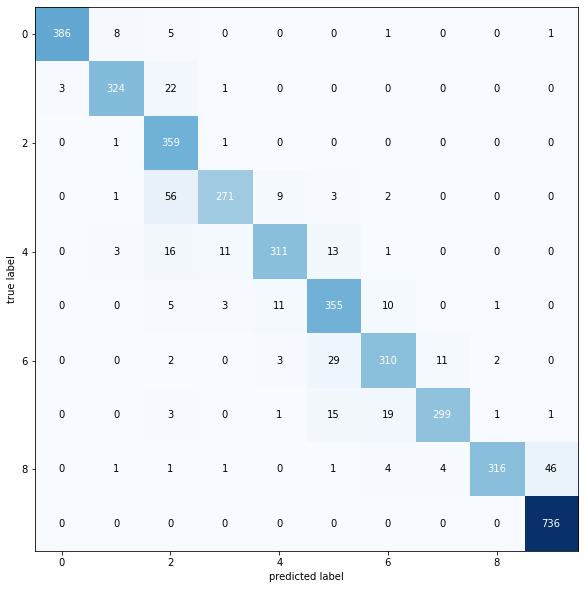

In [79]:
conf_mat_func(train_dl, model)

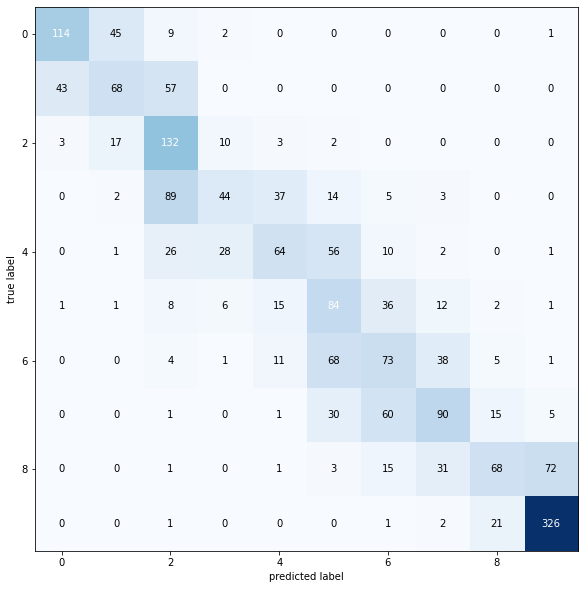

In [80]:
conf_mat_func(val_dl, model)

In [81]:
checkpoint = torch.load("best_loss_model.pt")
model.load_state_dict(checkpoint["model"])

<All keys matched successfully>

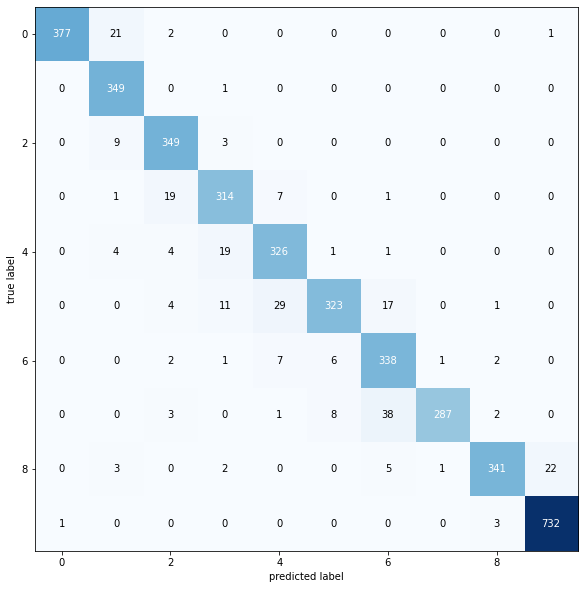

In [82]:
conf_mat_func(train_dl, model)

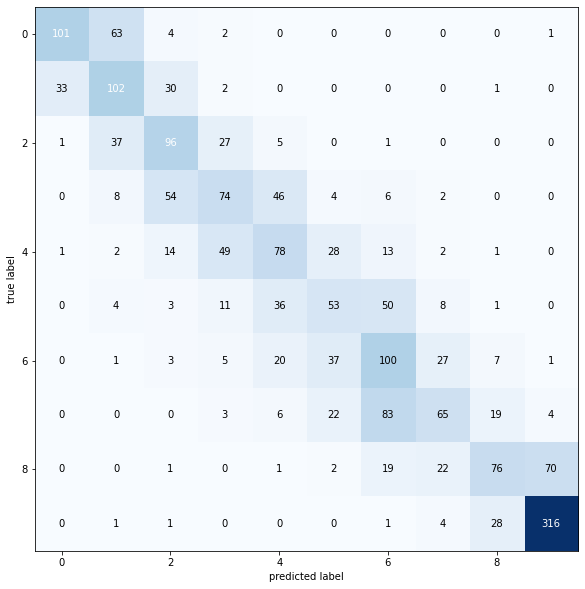

In [83]:
conf_mat_func(val_dl, model)

In [85]:
checkpoint = torch.load("latest_model.pt")
model.load_state_dict(checkpoint["model"])

<All keys matched successfully>

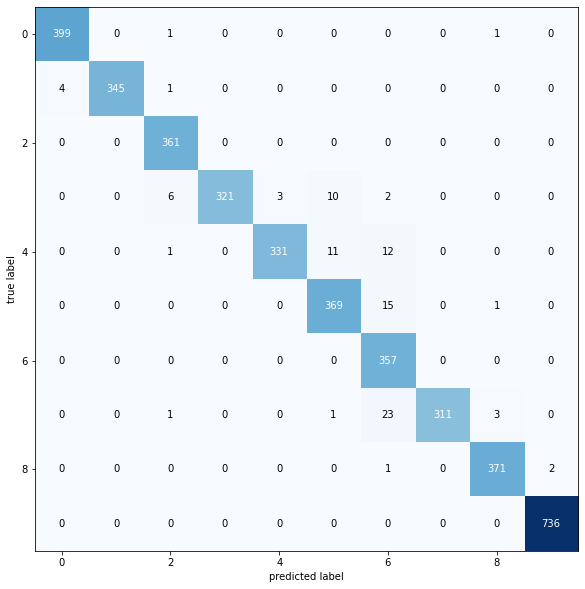

In [86]:
conf_mat_func(train_dl, model)

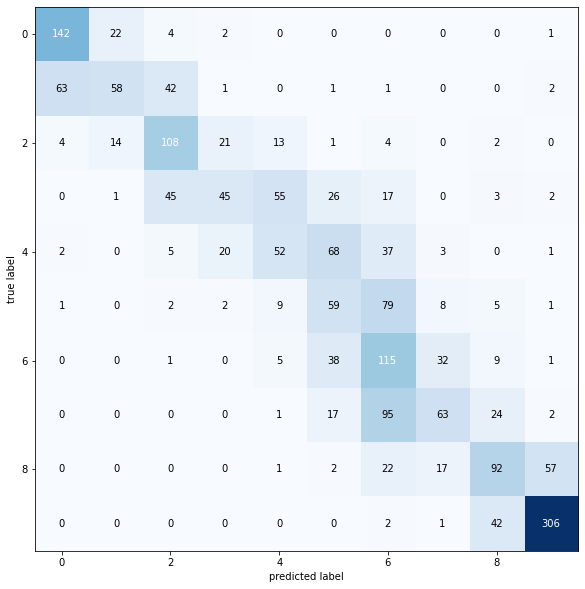

In [87]:
conf_mat_func(val_dl, model)

In [92]:
def prepare_submission(model, name):
  pred = []
  sub_df = test_df.copy()
  with torch.no_grad():
    for patch in test_dl:
      if device == "cuda:0":
        dev_patch = patch.cuda()
      output = model(dev_patch)
      output = torch.argmax(output, dim=1).cpu().tolist()
      for el in output:
        pred.append(el)
  sub_df["age"] = pred
  for age_group in class_encode_dict.keys():
    sub_df["age"].replace(class_encode_dict[age_group], age_group, inplace = True)
  sub_df.to_csv(f"{name}.csv")

In [93]:
checkpoint = torch.load("best_accuracy_model.pt")
model.load_state_dict(checkpoint["model"])

<All keys matched successfully>

In [94]:
prepare_submission(model,"accuracy")

In [95]:
checkpoint = torch.load("best_loss_model.pt")
model.load_state_dict(checkpoint["model"])
prepare_submission(model,"loss")

In [96]:
checkpoint = torch.load("latest_model.pt")
model.load_state_dict(checkpoint["model"])
prepare_submission(model,"latest")